In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install gsw

# Download a data file from github, if it doesn't exist
!test ! -f KIS2fake.dat && wget 'https://raw.githubusercontent.com/edur409/ENVPHYS/main/KIS2fake.dat'

# Read the file

the file contains a header of nine lines and a footer of two lines.

In [49]:
colnames=['P_dbar', 'T_C', 'S_kgKg', 'T_NTU', 'U_mps']
KIS2 = pd.read_csv('KIS2fake.dat', delimiter='\s+', skiprows=9, skipfooter=2, names = colnames, engine ='python', header = None)
KIS2 = KIS2.apply(pd.to_numeric, errors='coerce') # Convert values to numbers and substitute the rest with NaNs


In [3]:
KIS2.describe()


,P_dbar,T_C,S_kgKg,T_NTU,U_mps
count,6297.000000,6297.000000,6297.000000,6296.000000,6296.000000
mean,534.199472,-1.959579,34.781602,0.020587,-0.005209
std,70.025147,0.116689,0.124128,0.056010,0.032054
min,409.293000,-2.184540,34.565900,-0.071110,-0.046289
25%,473.622000,-2.000920,34.659900,0.004360,-0.028341
50%,536.123000,-1.908460,34.861200,0.023471,-0.014722
75%,595.388000,-1.869620,34.877700,0.039993,0.009926
max,650.955000,-1.843720,34.888000,0.163774,0.066464


## Convert all columns to arrays

In [4]:
pressure = np.array(KIS2.P_dbar)
salinity = np.array(KIS2.S_kgKg)
temperature = np.array(KIS2.T_C)
turbidity = np.array(KIS2.T_NTU)
velocity = np.array(10*KIS2.U_mps)

# Plot the values


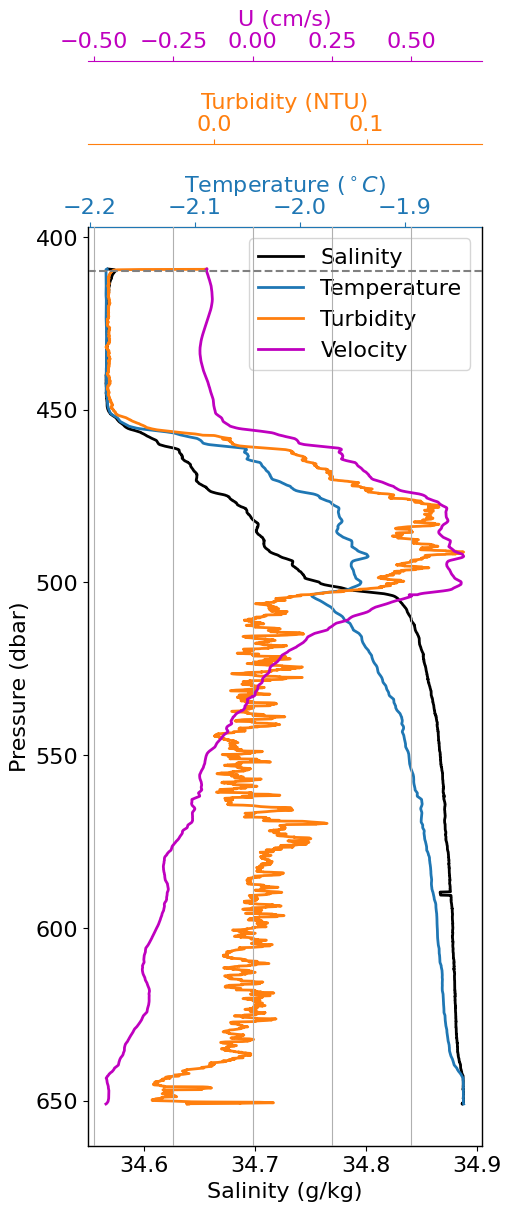

In [20]:
plt.rcParams['font.size'] = 16
# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(5,12), layout='constrained') # (width, height) in inches
    
ax2 = host.twiny()
ax3 = host.twiny()
ax4 = host.twiny()
    
#host.set_xlim(time[0], time[-1])
#host.set_ylim(np.min(RH_mean),np.max(RH_mean))
#ax2.set_ylim(np.min(T_mean),np.max(T_mean))
#ax3.set_ylim(np.min(P_mean),np.max(P_mean))
    
host.set_ylabel("Pressure (dbar)")
host.set_xlabel("Salinity (g/kg)")
ax2.set_xlabel(r"Temperature ($^\circ C$)")
ax3.set_xlabel("Turbidity (NTU)")
ax4.set_xlabel("U (cm/s)")

color1, color2, color3, color4 = ['k', 'tab:blue', 'tab:orange', 'm']#plt.cm.rainbow([0, .5, .9])

p1 = host.plot(salinity, pressure, lw = 2,   color=color1, label="Salinity")
#host.errorbar(pressure, RH_mean, yerr=RH_std, label = 'Std', color = color1)
p2 = ax2.plot(temperature, pressure, lw = 2,   color=color2, label="Temperature")
#ax2.errorbar(pressure, T_mean, yerr=T_std, label = 'Std', color = color2)
p3 = ax3.plot(turbidity, pressure, lw = 2, color=color3, label="Turbidity")
#ax3.errorbar(pressure, P_mean, yerr=P_std, label = 'Std', color = color3)
p4 = ax4.plot(velocity, pressure, lw = 2, color=color4, label="Velocity")

host.legend(handles=p1+p2+p3+p4, loc='best')

# right, left, top, bottom
ax3.spines['top'].set_position(('outward', 60))
ax4.spines['top'].set_position(('outward', 120))

# no x-ticks                 
# host.xaxis.set_ticks([])

host.xaxis.label.set_color(p1[0].get_color())
ax2.tick_params(axis='x', colors=p2[0].get_color())
ax2.spines['top'].set_color(p2[0].get_color())
ax2.xaxis.label.set_color(p2[0].get_color())
ax3.tick_params(axis='x', colors=p3[0].get_color())
ax3.spines['top'].set_color(p3[0].get_color())
ax3.xaxis.label.set_color(p3[0].get_color())
ax4.tick_params(axis='x', colors=p4[0].get_color())
ax4.spines['top'].set_color(p4[0].get_color())
ax4.xaxis.label.set_color(p4[0].get_color())
plt.axhline(410, color='gray', linestyle = '--')
plt.grid(True)
plt.gca().invert_yaxis()
# For professional typesetting, e.g. LaTeX, use .pgf or .pdf
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=300)'
plt.savefig("KIS2_multiple_x-axis.pdf", bbox_inches='tight')

# Buoyancy frequency

$$N = \sqrt{-\frac{g}{\rho}\frac{d\rho}{dz}}$$

$$N = \sqrt{-\frac{g}{T}\frac{dT}{dz}}$$

In [ ]:
# Estimate the buoyancy frequency here 

In [21]:
# !pip install gsw
import gsw
rho = gsw.density.rho(salinity, temperature, pressure) # kg/m^3

In [47]:
g = 9.8
N2 = -(g/rho[:-1])*(np.diff(rho)/(np.diff(10000*pressure)/(rho[:-1]*g)))

(np.float64(409.293), np.float64(650.955), np.float64(-4.0), np.float64(1.0))

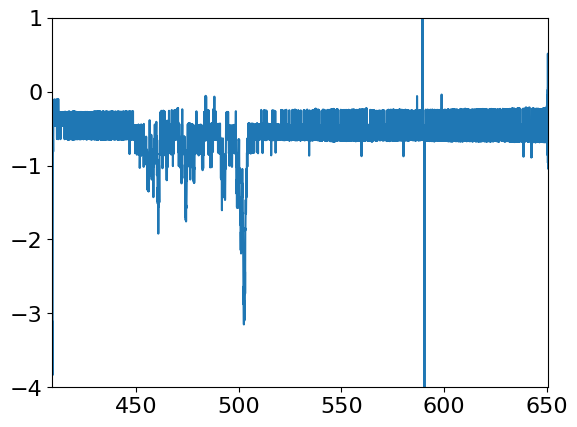

In [48]:
plt.plot(pressure[:-1],N2)
plt.axis([pressure.min(), pressure.max(), -4, 1])

# Question 2: Re-freezing of the borehole

$$f_{ice} = f_{latent} =\phi \rho L_f \frac{dA'}{dt}\frac{1}{2\pi a}$$

$$R (t - t_s) = \sqrt{a^2 - \frac{2a}{\phi \rho L_f} \int_{t_{s}}^t f_{ice}(t')dt'}$$